In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
from scipy.spatial import distance
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r"D:\Aadesh\MSC\Dataset\SocialNetworkAds.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
for i in range(len(data["Age"])):
    if data.loc[i,"Gender"]=="Male":
        data.loc[i,"Gender"]=1
    else:
        data.loc[i,"Gender"]=0


In [5]:
data.drop("User ID",axis=1,inplace=True)

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns =['Gender', 'Age','EstimatedSalary','Purchased']

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [7]:
data.shape

(400, 4)

In [8]:
data["Purchased"].unique()

array([0, 1], dtype=int64)

In [9]:
y=data["Purchased"]
x=data.drop("Purchased",axis=1)

In [10]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Whole dataset

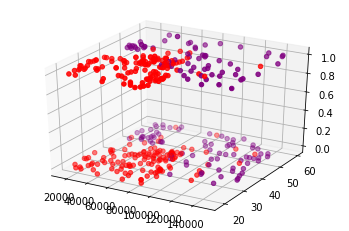

In [12]:
colors = ['red','green','blue','purple']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x["EstimatedSalary"],x["Age"],x["Gender"],c=y,cmap=matplotlib.colors.ListedColormap(colors))

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)

# Training Dataset

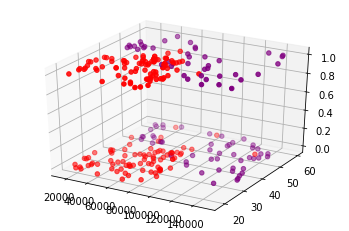

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xtrain["EstimatedSalary"],xtrain["Age"],xtrain["Gender"],c=ytrain,cmap=matplotlib.colors.ListedColormap(colors))

# Testing dataset

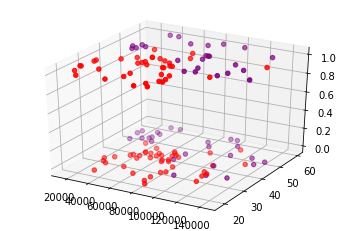

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xtest["EstimatedSalary"],xtest["Age"],xtest["Gender"],c=ytest,cmap=matplotlib.colors.ListedColormap(colors))

# KNN

In [17]:
def knn(x,y,n):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)
    ypre=[]
    for index1, row in xtest.iterrows():    #iterrate over xtest
        nearpoints=pd.DataFrame({'Dis' : [np.nan],'Lab' : [np.nan]})   #it will store distnce and label of all near points
        xtg=row['Gender']   #gender of a record in xtest
        xta=row['Age']   #age of a record in xtest
        xtes=row["EstimatedSalary"] #salary of a record in xtest
        for index, row1 in xtrain.iterrows():
            xtraing=row1['Gender'] #gender of a record in xtrain
            xtraina=row1['Age']  #age of a record in xtrain
            xtraines=row1["EstimatedSalary"]  #salary of a record in xtrain
            a=distance.euclidean([xtg,xta,xtes],[xtraing,xtraina,xtraines])   #it will calculate the distence between each point w.r.t xtest point
            for i, value in ytrain.items():
                if i==index:
                    d=value # it will store the label value of xtrain record
                    break
            nearpoints.loc[index,"Dis"]=a
            nearpoints.loc[index,"Lab"]=d
            #nearpoints will have distance and label from xtest point to each point in xtrain 
            nearpoints.sort_values(["Dis"], axis = 0,inplace = True) #it will sort nearpoint by distance
            xtop=nearpoints.head(n)  #it will store nearest points
            a=xtop['Lab'].value_counts().idxmax()
        ypre.append(a)
    plot(ypre)
    return ypre
def plot(y):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(xtest["EstimatedSalary"],xtest["Age"],xtest["Gender"],c=y,cmap=matplotlib.colors.ListedColormap(colors))
    
    

In [38]:
k=[]
accuracy=[]

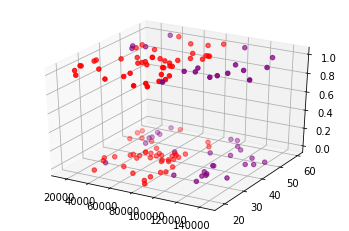

In [39]:
ypre3=knn(x,y,3)
a3=accuracy_score(ytest,ypre3)
k.append(3)
accuracy.append(a3)

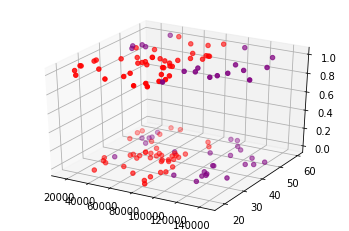

In [40]:
ypre5=knn(x,y,5)
a5=accuracy_score(ytest,ypre5)
k.append(5)
accuracy.append(a5)

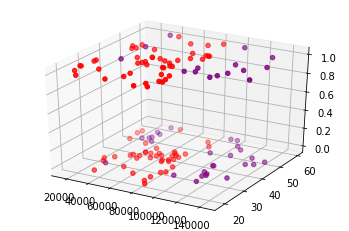

In [41]:
ypre7=knn(x,y,7)
a7=accuracy_score(ytest,ypre7)
k.append(7)
accuracy.append(a7)

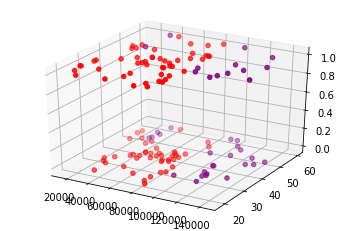

In [42]:
ypre13=knn(x,y,13)
a13=accuracy_score(ytest,ypre13)
k.append(13)
accuracy.append(a13)

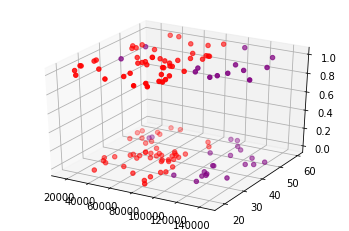

In [43]:
ypre17=knn(x,y,17)
a17=accuracy_score(ytest,ypre17)
k.append(17)
accuracy.append(a17)

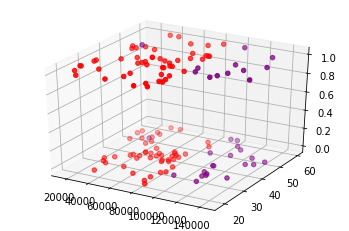

In [44]:
ypre27=knn(x,y,27)
a27=accuracy_score(ytest,ypre27)
k.append(27)
accuracy.append(a27)

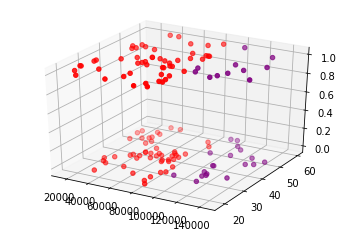

In [45]:
ypre37=knn(x,y,37)
a37=accuracy_score(ytest,ypre37)
k.append(37)
accuracy.append(a37)

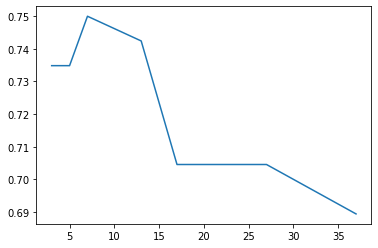

In [46]:
plt.plot(k,accuracy)